# 2 Модель Б

Загрузка данных 

In [1]:
import pandas as pd

In [2]:
articles_full = pd.read_pickle('articles_full_end.pkl')
articles_full

,name_company,text,date,description,activity,rating,part_speech,tfidf,vector,nominations,code,month
0,cybersport.metaratings,"[декабрь, состояться, церемония, награждение, ...",20211208,[пусто],[пусто],0,"[(именно, Неизвестно), (vinci, Неизвестно), (м...","{'номинация': 0.4378978809844386, 'проект': 0....","(0, 821)\t0.02189489404922193\n (0, 600)\t0...",Игровая индустрия и киберспорт,1.0,1208.0
1,esforce holding,"[декабрь, состояться, церемония, награждение, ...",20211208,[пусто],[пусто],0,"[(именно, Неизвестно), (vinci, Неизвестно), (м...","{'номинация': 0.4378978809844386, 'проект': 0....","(0, 821)\t0.02189489404922193\n (0, 600)\t0...",Игровая индустрия и киберспорт,1.0,1208.0
2,esforce holding,"[совместный, исследование, издатель, компьютер...",20210729,[пусто],[пусто],0,"[(склонный, Имя прилагательное (полное)), (дел...","{'игра': 0.19050019050028574, 'world': 0.15875...","(0, 426)\t0.031750031750047626\n (0, 649)\t...",Игровая индустрия и киберспорт,1.0,729.0
3,esforce holding,"[статистика, esports, observer, половина, год,...",20210709,[пусто],[пусто],0,"[(тактический, Имя прилагательное (полное)), (...","{'канал': 0.32795663669996916, 'dota': 0.14907...","(0, 352)\t0.0298142396999972\n (0, 145)\t0....",Игровая индустрия и киберспорт,1.0,709.0
4,esforce holding,"[компания, superdata, research, paypal, провес...",20210411,[пусто],[пусто],0,"[(большинство, Имя существительное), (именно, ...","{'киберспорт': 0.27443361224780893, 'миллион':...","(0, 81)\t0.022869467687317412\n (0, 68)\t0....",Игровая индустрия и киберспорт,1.0,411.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1212,цифровое образование,"[министерство, труд, социальноить, защита, рос...",20210811,[пусто],[пусто],0,"[(сбор, Имя существительное), (рынок, Имя суще...","{'цифровой': 0.3549253530262946, 'след': 0.236...","(0, 56)\t0.03943615033625495\n (0, 45)\t0.0...",Образование и Кадры,4.0,811.0
1213,цифровое образование,"[министр, просвещение, сергей, кравцов, доклад...",20210116,[пусто],[пусто],0,"[(пока, Наречие), (reactjs, Неизвестно), (дела...","{'сферум': 0.22703830459324992, 'образовательн...","(0, 8)\t0.045407660918649985\n (0, 227)\t0....",Образование и Кадры,4.0,116.0
1214,цифровое образование,"[великия, уравнитель, одной, команда, мочь, ра...",20211220,[пусто],[пусто],0,"[(лабораторный, Имя прилагательное (полное)), ...","{'образование': 0.3599744580998304, 'диплом': ...","(0, 1306)\t0.008371499025577453\n (0, 4013)...",Образование и Кадры,4.0,1220.0
1215,цифровое образование,"[сегодня, взять, рука, книжка, эндрю, таненбау...",20211114,[пусто],[пусто],0,"[(именно, Неизвестно), (упомянуть, Инфинитив),...","{'таненбаум': 0.22113289104342324, 'книга': 0....","(0, 96)\t0.022113289104342324\n (0, 760)\t0...",Образование и Кадры,4.0,1114.0


In [3]:
articles_full.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 1217 entries, 0 to 1216

Data columns (total 12 columns):

 #   Column        Non-Null Count  Dtype  

---  ------        --------------  -----  

 0   name_company  1217 non-null   object 

 1   text          1217 non-null   object 

 2   date          1217 non-null   int32  

 3   description   1217 non-null   object 

 4   activity      1217 non-null   object 

 5   rating        1217 non-null   object 

 6   part_speech   1217 non-null   object 

 7   tfidf         1217 non-null   object 

 8   vector        1217 non-null   object 

 9   nominations   1217 non-null   object 

 10  code          1217 non-null   float64

 11  month         1217 non-null   float64

dtypes: float64(2), int32(1), object(9)

memory usage: 118.8+ KB


## 2.1 Построение модели классификации

### Разбиение выборки на обучающую и тестовую

Данные для классификации должны быть числовыми, потому что многие алгоритмы машинного обучения работают с числовыми данными. Поэтому нужно закодировать строковые данные: name_company - категориальный признак, можно закодировать LabelEncoder, text, description и activity - текстовые значения, векоризируем, rating - изменить тип

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(articles_full['name_company'])
articles_full['name_code'] = encoded_data

In [6]:
articles_full["rating"] = articles_full["rating"].astype('float') 

In [7]:
from tqdm.auto import tqdm

In [8]:
for i in tqdm(range(len(articles_full))):
    articles_full.at[i, "text"] = " ".join(articles_full["text"][i])
    articles_full.at[i, "activity"] = " ".join(articles_full["activity"][i])
    articles_full.at[i, "description"] = " ".join(articles_full["description"][i])

  0%|          | 0/1217 [00:00<?, ?it/s]

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
vectorizer = TfidfVectorizer()
tfidf_matrix_text = vectorizer.fit_transform(articles_full["text"])
tfidf_matrix_description = vectorizer.fit_transform(articles_full["description"])
tfidf_matrix_activity = vectorizer.fit_transform(articles_full["activity"])

На шаге 1.5 "Разведочный анализ" показана не сбалансированность данных: большое количество нулевой и третей групп номинации, это нужно учесть для грамотного разбиение выборки на обучающую и тестовую, параметр "**stratify**" отвечает за это. Он разбивает данные таким способом, что в обучающейся и тестовой выборках равное соотношений номинаций

Выборка состоит из 1217 записей. Количество данных достаточно для проведения надлежащего обучения модели. Будет использовано 80% выборки для обучения, что позволит модели получить достаточно информации для корректной работы. Оставшиеся 20% будут использованы, для проверки работоспособности на новых, не изученных данных

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
data = articles_full[["name_code", "rating", "date"]]
X = pd.concat([pd.DataFrame(tfidf_matrix_text.toarray()), data, pd.DataFrame(tfidf_matrix_description.toarray()),pd.DataFrame(tfidf_matrix_activity.toarray()),], axis=1)
X.columns = X.columns.astype(str)
y = articles_full['code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

На шаге 1.2 "Формирование структуры набора данных" описаны важные признаки.

   - **name_company** - строковый тип данных, не имеет пропусков, является основным признаком, определяющий компанию номинанта.
   - **text** - является одним из основных признаков так, как определяет то, о чем пишет компания.
   - **date** - не является основным признаком, может отобразить только разницу в дате публикации статей, что не сильно коррелирует с номинированными на премию
   - **description** - не является основным признаком, зачастую не несет рекламный характер, практически ни как не отражает деятельность компании и имеет много пропусков
   - **activity** - не является основным признаком, но описывает сферу деятельности компании, что поможет выявить наиболее подходящую номинацию 
   - **rating** - не является основным признаком, отражает положения компании, в топе компаний, что не поможет номинировать их, много пропусков


### Обучение моделей 

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [14]:
info_model = {"name_model":[], "accuracy":[], "F1-score":[]}

Логистическая регрессия - это статистический алгоритм, который используется для решения задач классификации:
 - Прост и быстро реализует алгоритм
 - Эффективен на больших наборах данных
 - Он не справляется с сложными нелинейными зависимостями и не учитывает взаимодействия между признаками

In [15]:
%%time
from sklearn.linear_model import LogisticRegression

# Создание модели логистической регрессии
model_lr = LogisticRegression()

# Обучение модели на тренировочных данных
model_lr.fit(X_train, y_train)

# Прогнозирование классов на тестовых данных
predictions_lr = model_lr.predict(X_test)

info_model["name_model"].append("LogisticRegression")

info_model["accuracy"].append(accuracy_score(y_test, predictions_lr))

info_model["F1-score"].append(f1_score(y_test, predictions_lr, average='macro'))

CPU times: total: 20.5 s

Wall time: 10.4 s


Метод опорных векторов (Support Vector Machine) - широко применяется для задач классификации и регрессии:
 - Стремится найти оптимальную гиперплоскость, которая наилучшим образом разделяет данные разных классов
 - Регулируемый баланс между сложностью модели и обобщающей способностью
 - Он может быть чувствителен к выбору ядра и параметров модели
 - Вычислительно требовательным при работе с очень большими наборами данных

In [16]:
%%time
from sklearn.svm import SVC

# Создание модели метода опорных векторов
model_svm = SVC()

# Обучение модели на тренировочных данных
model_svm.fit(X_train, y_train)

# Прогнозирование классов на тестовых данных
predictions_svm = model_svm.predict(X_test)

info_model["name_model"].append("SVC")

info_model["accuracy"].append(accuracy_score(y_test, predictions_svm))

info_model["F1-score"].append(f1_score(y_test, predictions_svm, average='macro'))

CPU times: total: 3min 53s

Wall time: 1min 33s


Случайный лес (Random Forest) -  это алгоритм машинного обучения, который использует ансамбль решающих деревьев для решения задач классификации и регрессии:
 - Высокая точность
 - Устойчивость к переобучению
 - Обработка большого количества признаков
 - Возможность оценки важности признаков
 - Быстрюч))

In [17]:
%%time
from sklearn.ensemble import RandomForestClassifier

# Создание модели случайного леса
model_rf = RandomForestClassifier()

# Обучение модели на тренировочных данных
model_rf.fit(X_train, y_train)

# Прогнозирование классов на тестовых данных
predictions_rf = model_rf.predict(X_test)

info_model["name_model"].append("RandomForestClassifier")

info_model["accuracy"].append(accuracy_score(y_test, predictions_rf))

info_model["F1-score"].append(f1_score(y_test, predictions_rf, average='macro'))

CPU times: total: 9.64 s

Wall time: 11.3 s


In [18]:
info_model_DF = pd.DataFrame(info_model)
info_model_DF

,name_model,accuracy,F1-score
0,LogisticRegression,0.368852,0.089820
1,SVC,0.368852,0.089820
2,RandomForestClassifier,0.762295,0.423771


Случайный лес показал наиболее хорошие результаты на тестовых данных, и именно accuracy=76% и F1-score=42%. Он и будет применен в дальнейшем улучшении модели

## 2.2 Оптимизация модели

### Выделение ключевых признаков

В пинте 1.3 "Предварительная обработка текстовых данных" в столбцах: description, activity, rating было заменено много пустых значений, вероятно это пагубно сказывается на модели, уберем их

In [19]:
data = articles_full[["name_code"]]
X_partial = pd.concat([pd.DataFrame(tfidf_matrix_text.toarray()), data], axis=1)
X_partial.columns = X_partial.columns.astype(str)
y = articles_full['code']

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_partial, y, test_size=0.2, stratify=y, random_state=42)

In [20]:
%%time
from sklearn.ensemble import RandomForestClassifier

# Создание модели случайного леса
model_rf = RandomForestClassifier()

# Обучение модели на тренировочных данных
model_rf.fit(X_train_p, y_train_p)

# Прогнозирование классов на тестовых данных
predictions_rf = model_rf.predict(X_test_p)

info_model["name_model"].append("RandomForestClassifier_partial")

info_model["accuracy"].append(accuracy_score(y_test_p, predictions_rf))

info_model["F1-score"].append(f1_score(y_test, predictions_rf, average='macro'))

CPU times: total: 11.3 s

Wall time: 14.1 s


In [21]:
info_model_DF = pd.DataFrame(info_model)
info_model_DF

,name_model,accuracy,F1-score
0,LogisticRegression,0.368852,0.089820
1,SVC,0.368852,0.089820
2,RandomForestClassifier,0.762295,0.423771
3,RandomForestClassifier_partial,0.721311,0.373400


Модель стала только хуже, вернем все назад

### Понижение размерности 

In [27]:
data = articles_full[["name_code", "rating", "date"]]
X = pd.concat([pd.DataFrame(tfidf_matrix_text.toarray()), data, pd.DataFrame(tfidf_matrix_description.toarray()),pd.DataFrame(tfidf_matrix_activity.toarray()),], axis=1)
X.columns = X.columns.astype(str)

In [28]:
from sklearn.decomposition import PCA

# Создание объекта PCA
pca = PCA(n_components=2)  # Указываем количество компонент

# Преобразование данных
X_transformed = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, stratify=y, random_state=42)

# Использование преобразованных данных для обучения модели
model_rf.fit(X_train, y_train)

predictions_rf = model_rf.predict(X_test)

info_model["name_model"].append("RandomForestClassifier_PCA")

info_model["accuracy"].append(accuracy_score(y_test, predictions_rf))

info_model["F1-score"].append(f1_score(y_test, predictions_rf, average='macro'))

info_model_DF = pd.DataFrame(info_model)
info_model_DF

,name_model,accuracy,F1-score
0,LogisticRegression,0.368852,0.089820
1,SVC,0.368852,0.089820
2,RandomForestClassifier,0.762295,0.423771
3,RandomForestClassifier_partial,0.721311,0.373400
4,RandomForestClassifier_PCA,0.885246,0.598460
5,RandomForestClassifier_PCA,0.893443,0.617462


Модель улучшилась, в дальнейшом ипользовать эти данные 

### Настройки гиперпараметров модели

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [1, 2, 5, 10]
}
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

# Вывод наилучших гиперпараметров
print("Наилучшие гиперпараметры:", grid_search.best_params_)

predictions_rf = grid_search.predict(X_test)

info_model["name_model"].append("GridSearchCV")

info_model["accuracy"].append(accuracy_score(y_test, predictions_rf))

info_model["F1-score"].append(f1_score(y_test, predictions_rf, average='macro'))

info_model_DF = pd.DataFrame(info_model)
info_model_DF

# Оценка производительности модели на тестовом наборе данных
accuracy = grid_search.score(X_test, y_test)
print("Точность на тестовом наборе данных:", accuracy)


Наилучшие гиперпараметры: {'max_depth': None, 'min_samples_split': 1, 'n_estimators': 300}

Точность на тестовом наборе данных: 0.8934426229508197


In [31]:
info_model_DF = pd.DataFrame(info_model)
info_model_DF

,name_model,accuracy,F1-score
0,LogisticRegression,0.368852,0.089820
1,SVC,0.368852,0.089820
2,RandomForestClassifier,0.762295,0.423771
3,RandomForestClassifier_partial,0.721311,0.373400
4,RandomForestClassifier_PCA,0.885246,0.598460
5,RandomForestClassifier_PCA,0.893443,0.617462
6,GridSearchCV,0.893443,0.616900


Лучшие параметры не отличаться от параметром по умолчанию, способ не работает 

### Визуализация 

In [40]:
pip install yellowbrick

















Note: you may need to restart the kernel to use updated packages.


C:\Users\nudan\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier

  warnings.warn(


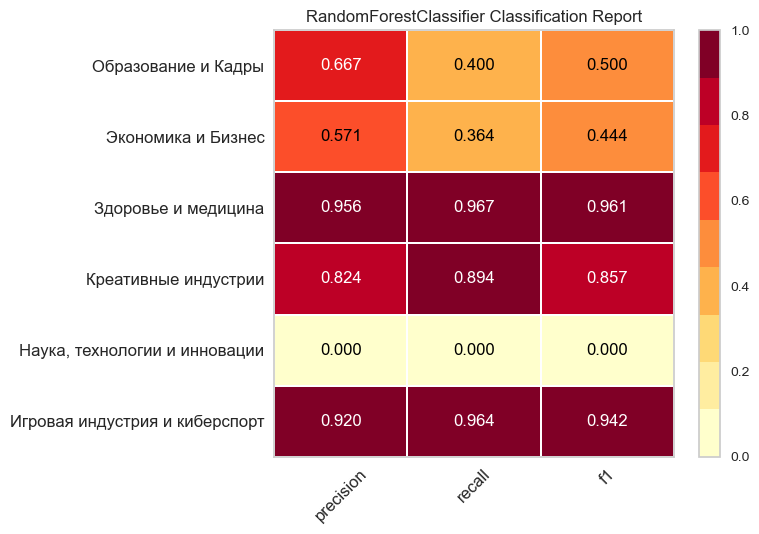

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [33]:
from yellowbrick.classifier import ClassificationReport

# Создание экземпляра классификатора
model = RandomForestClassifier()

# Обучение модели
model.fit(X_train, y_train)

# Получение предсказаний на тестовых данных
y_pred = model.predict(X_test)

# Визуализация Classification Report
visualizer = ClassificationReport(model_rf, classes=articles_full['nominations'].unique())
visualizer.score(X_test, y_test)
visualizer.show()

Наука и техника - не определяет 
Здоровья и медицина - отлично классифицируется 
так же и игровая индустрия и киберспорт 
остальное хорошо

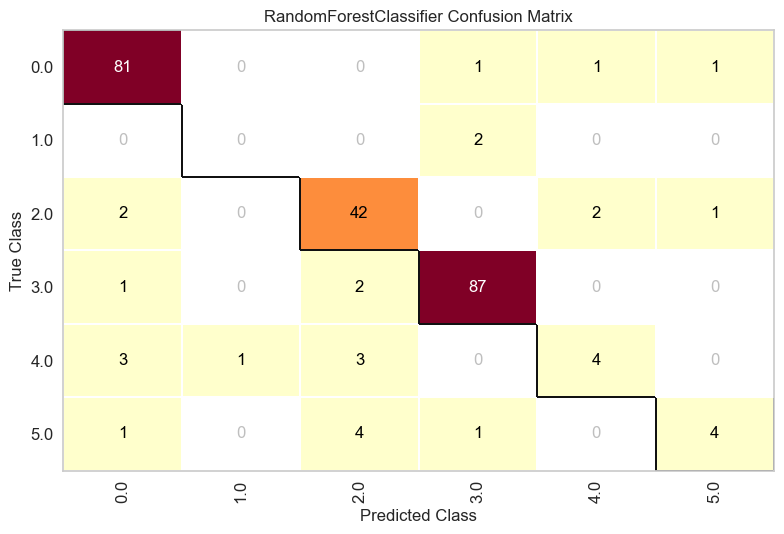

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [34]:
from yellowbrick.classifier import ConfusionMatrix


# Создание экземпляра ConfusionMatrix с моделью
visualizer = ConfusionMatrix(model_rf)

# Обучение модели и визуализация матрицы ошибок
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

# Отображение визуализации
visualizer.show()

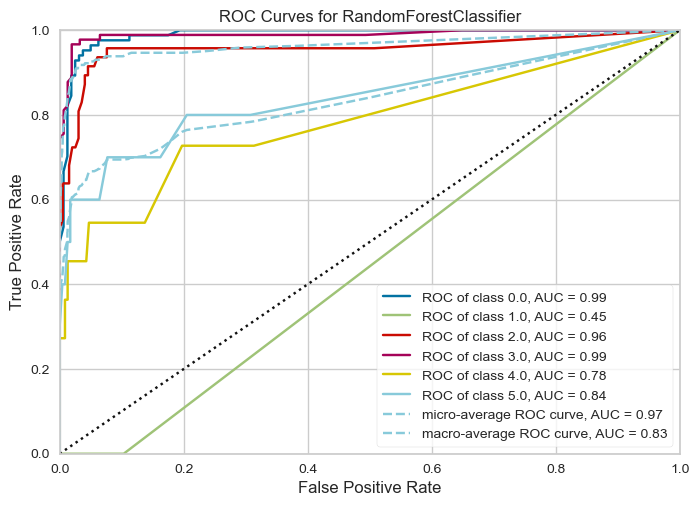

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [41]:
from yellowbrick.classifier import ROCAUC

# Создание экземпляра ROCAUC с моделью
visualizer = ROCAUC(model_rf)

# Обучение модели и визуализация кривой ROC-AUC
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

# Отображение визуализации
visualizer.show()

Отлично определились категории 0 и 3, не отстаёт категории 2 и 4, все же остальные категории определились плохо, так как в изначальном dataframe их было малое количество

### Сохранение модели 

In [36]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(grid_search, f)

In [37]:

# Загрузка сохраненной модели из файла .pkl
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

# Использование загруженной модели для прогнозирования
predictions = model.predict(X_test)

## Отчет 

- 2.1 Построение модели классификации
    - Разбиение выборки на обучающую и тестовую: Выборка состоит из 1217 записей. Количество данных достаточно для проведения надлежащего обучения модели. Будет использовано 80% выборки для обучения, что позволит модели получить достаточно информации для корректной работы. Оставшиеся 20% будут использованы, для проверки работоспособности на новых, не изученных данных
    - Обучение моделей: Случайный лес показал наиболее хорошие результаты на тестовых данных, и именно accuracy = 76% и F1-score = 42%. Он и будет применен в дальнейшем улучшении модели

- 2.2 Оптимизация модели
    - Выделение ключевых признаков: ухудшило модель 
    - Понижение размерности: дало существенный прирост 
    - Настройки гиперпараметров модели: не дало результата 
    - Визуализация: отлично определились категории 0 и 3, не отстаёт категории 2 и 4, все же остальные категории определились плохо, так как в изначальном dataframe их было малое количество
    - Сохранение модели